# Import packages you need and data

In [1]:
## import all the packages you need 
import psycopg2
import pandas as pd
from getpass import getpass
from sqlalchemy import create_engine
import seaborn as sns
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, auc, roc_curve
warnings.filterwarnings('ignore')

# Import data

In [2]:
# Load the data (replace 'data.csv' with your data file)
data = pd.read_csv('/Users/polina/Desktop/BIS568 AppliedMachine/hw3_Ovchinnikova/data.csv')

In [16]:
data.head()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,1,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,NaN,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploratory Data Analysis 

Paper: 972 variables extracted per visit from the EHR, including previous healthcare usage statistics, past medical history, historical labs and vitals, prior imaging counts, and outpatient medications, as well as fine demographic details such as insurance and employment status.

In [13]:
# Display basic information about the dataset
print(data.info())

# Data columns 
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 973 entries, Unnamed: 0 to cc_wristpain
dtypes: float64(589), int64(369), object(15)
memory usage: 4.1+ GB
None
Index(['Unnamed: 0', 'dep_name', 'esi', 'age', 'gender', 'ethnicity', 'race',
       'lang', 'religion', 'maritalstatus',
       ...
       'cc_vaginaldischarge', 'cc_vaginalpain', 'cc_weakness', 'cc_wheezing',
       'cc_withdrawal-alcohol', 'cc_woundcheck', 'cc_woundinfection',
       'cc_woundre-evaluation', 'cc_wristinjury', 'cc_wristpain'],
      dtype='object', length=973)


In [3]:
data.describe()

,Unnamed: 0,esi,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
count,560486.000000,558029.000000,560475.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,...,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000
mean,280243.500000,3.012385,49.876765,0.002155,0.030634,0.014807,0.000023,0.005179,0.009968,0.051054,...,0.001298,0.000717,0.013085,0.001052,0.001165,0.004219,0.002863,0.001233,0.001393,0.002518
std,161798.515826,0.869106,20.417029,0.046375,0.172324,0.120779,0.004816,0.071782,0.099342,0.220108,...,0.036001,0.026900,0.113638,0.032475,0.034113,0.064820,0.053426,0.035095,0.037293,0.050156
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140122.250000,2.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280243.500000,3.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,420364.750000,4.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,560486.000000,5.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [9]:
# Get numeric variables 
num_col = data.select_dtypes(include=['float64', 'int64'])
num_col.columns

Index(['Unnamed: 0', 'esi', 'age', 'disposition', '2ndarymalig', 'abdomhernia',
       'abdomnlpain', 'abortcompl', 'acqfootdef', 'acrenlfail',
       ...
       'cc_vaginaldischarge', 'cc_vaginalpain', 'cc_weakness', 'cc_wheezing',
       'cc_withdrawal-alcohol', 'cc_woundcheck', 'cc_woundinfection',
       'cc_woundre-evaluation', 'cc_wristinjury', 'cc_wristpain'],
      dtype='object', length=605)

In [5]:
# Summary statistics for numeric variables 
num_col.describe()

,Unnamed: 0,esi,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
count,560486.000000,558029.000000,560475.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,...,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000
mean,280243.500000,3.012385,49.876765,0.002155,0.030634,0.014807,0.000023,0.005179,0.009968,0.051054,...,0.001298,0.000717,0.013085,0.001052,0.001165,0.004219,0.002863,0.001233,0.001393,0.002518
std,161798.515826,0.869106,20.417029,0.046375,0.172324,0.120779,0.004816,0.071782,0.099342,0.220108,...,0.036001,0.026900,0.113638,0.032475,0.034113,0.064820,0.053426,0.035095,0.037293,0.050156
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140122.250000,2.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280243.500000,3.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,420364.750000,4.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,560486.000000,5.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
data[data.select_dtypes(include=['category']).columns] = data[data.select_dtypes(include=['category']).columns].astype(str)

In [10]:
# Get categorical variables 
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['dep_name', 'gender', 'ethnicity', 'race', 'lang', 'religion',
       'maritalstatus', 'employstatus', 'insurance_status', 'arrivalmode',
       'arrivalmonth', 'arrivalday', 'arrivalhour_bin', 'previousdispo'],
      dtype='object')

In [14]:
# Summary statistics for categorical variables 
cat_col.describe()

,dep_name,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo
count,560486,560486,560486,560486,560486,560486,560486,560486,560486,560486,560486,560486,560486,560486
unique,3,2,4,9,2,13,10,10,5,8,12,7,6,10
top,A,Female,Non-Hispanic,White or Caucasian,English,Catholic,Single,Not Employed,Medicaid,Car,May,Monday,11-14,Discharge
freq,322283,309653,462723,299632,514816,188979,263259,154059,194809,223086,58030,86028,145076,262237


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics for numerical variables
print(data.describe())

# Histograms for all numerical variables
#for col in df.select_dtypes(include='number').columns:
 #   plt.figure()
  #  sns.histplot(df[col], kde=True)
   # plt.title(f'Histogram of {col}')
    #plt.show()

# Bar plots for all categorical variables
#for col in df.select_dtypes(include='object').columns:
 #   plt.figure()
  #  sns.countplot(y=col, data=df)
   # plt.title(f'Bar Plot of {col}')
    #plt.show()


          Unnamed: 0       dep_name            esi            age  \
count  560486.000000  560486.000000  558029.000000  560475.000000   
mean   280243.500000       0.552929       3.012385      49.876765   
std    161798.515826       0.709274       0.869106      20.417029   
min         1.000000       0.000000       1.000000      18.000000   
25%    140122.250000       0.000000       2.000000      32.000000   
50%    280243.500000       0.000000       3.000000      49.000000   
75%    420364.750000       1.000000       4.000000      64.000000   
max    560486.000000       2.000000       5.000000     108.000000   

              gender      ethnicity           race           lang  \
count  560486.000000  560486.000000  560486.000000  560486.000000   
mean        0.447528       0.845504       5.020604       0.081483   
std         0.497239       0.406949       2.242096       0.273575   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.0000

Paper: Demographic information, either collected at triage or available from EHR at the time of patient encounter, included age, gender, primary language, ethnicity, employment status, insurance status, marital status, and religion. The primary language variable was recoded into a binary split (e.g., English vs. non-English), while the top twelve levels comprising >95% of all visits were retained for the religion variable and all other levels binned to one 'Other' category. All unique levels were retained for other demographic variables.

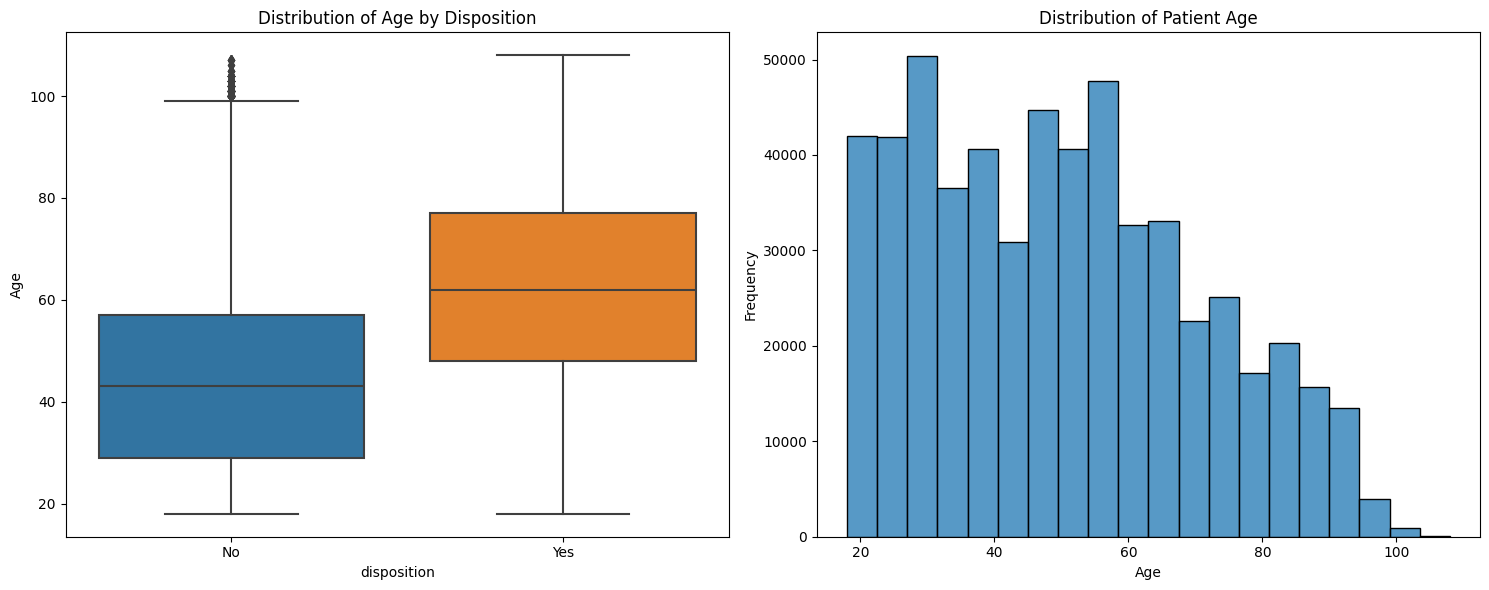

In [34]:
# Create a side-by-side box plot and a histogram in a single figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sns.histplot(data=data, x='age', bins=20, edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Patient Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=data, x="disposition", y="age", ax=axes[0])
axes[0].set_title("Distribution of Age by Disposition")
axes[0].set_xlabel("disposition")
axes[0].set_ylabel("Age")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No", "Yes"])

# Adjust layout
plt.tight_layout()
plt.show()

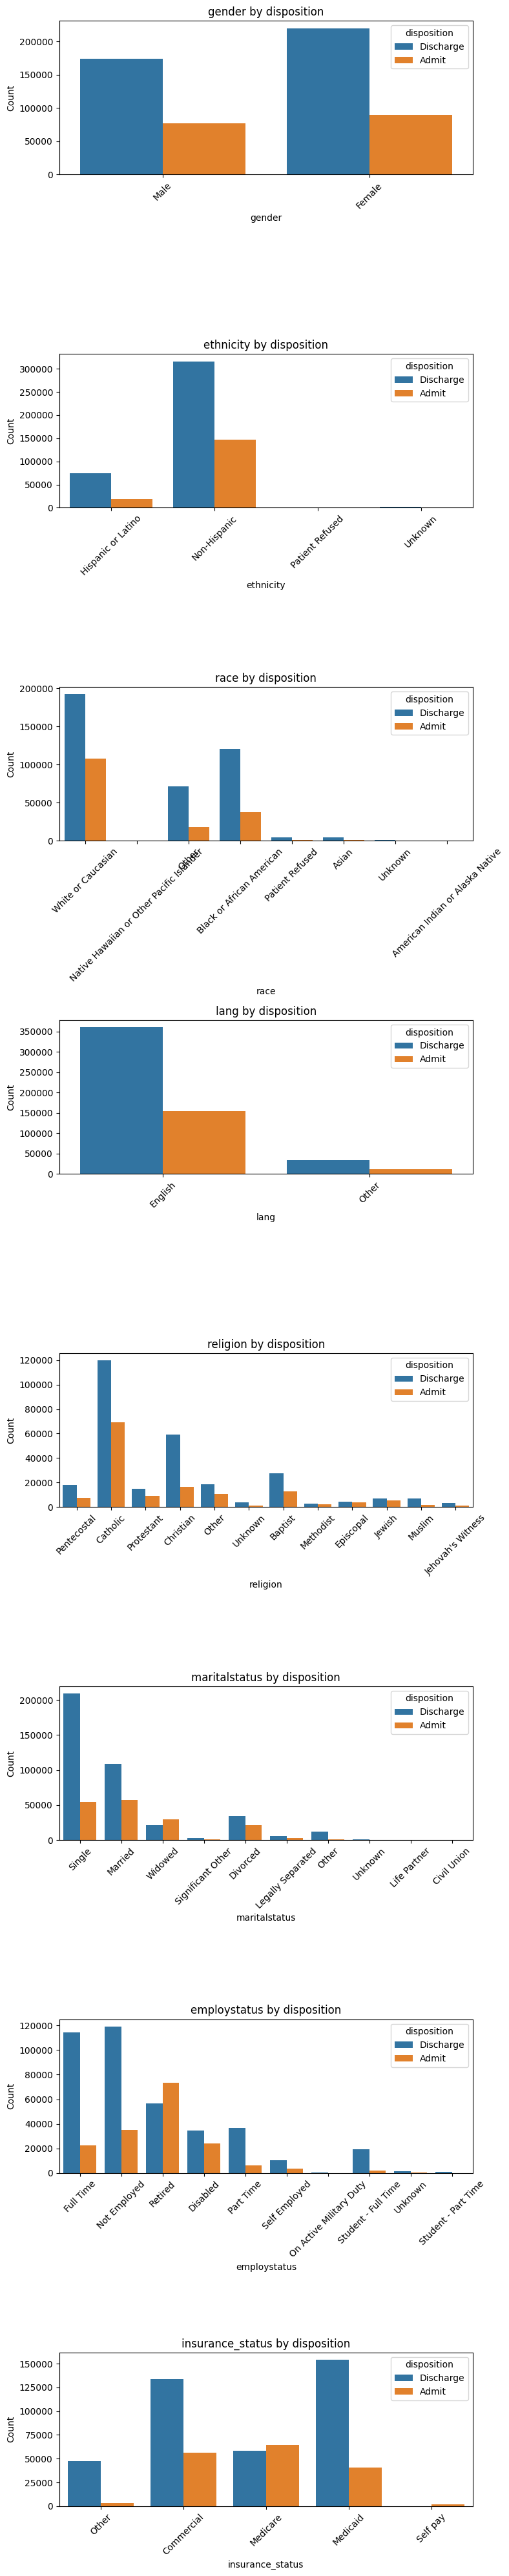

In [26]:
# Define the target variable
target_variable = "disposition"

# List of demographic variables to plot
demo_variables = ["gender", "ethnicity", "race", "lang", "religion", "maritalstatus", "employstatus", "insurance_status"]

# Create subplots with one column and multiple rows
n_rows = len(demo_variables)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(8, 5 * n_rows))

# Plot each demographic variable based on the target variable
for i, variable in enumerate(demo_variables):
    sns.countplot(data=data, x=variable, hue=target_variable, ax=axes[i])
    axes[i].set_title(f"{variable} by {target_variable}")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import scipy.stats as stats


# Define the target variable
target_variable = "disposition"

# Define a list of remaining variables (both numeric and categorical)
remaining_variables = [ 'gender', 'ethnicity', 'race', 'lang', 'religion', 'maritalstatus', 'employstatus', 'insurance_status',
                       'dep_name', 'arrivalmode', 'arrivalmonth', 'arrivalday', 'arrivalhour_bin']

# Initialize empty lists to store variable names and p-values
variable_names = []
p_values = []

# Loop through each variable and calculate p-value
for variable in remaining_variables:
    if data[variable].dtype == 'object':
        # Perform a chi-squared test for categorical variables
        contingency_table = pd.crosstab(data[variable], data[target_variable])
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    else:
        # Perform a t-test for numeric variables
        admission_values = df[df[target_variable] == 1][variable]
        discharge_values = df[df[target_variable] == 0][variable]
        _, p = stats.ttest_ind(admission_values, discharge_values, equal_var=False)
    
    variable_names.append(variable)
    p_values.append(p)

# Create a DataFrame to store variable names and p-values
p_value_df = pd.DataFrame({'Variable': variable_names, 'P-value': p_values})

# Print the p-values
print(p_value_df)


            Variable        P-value
0             gender   1.577827e-49
1          ethnicity   0.000000e+00
2               race   0.000000e+00
3               lang   8.737651e-80
4           religion   0.000000e+00
5      maritalstatus   0.000000e+00
6       employstatus   0.000000e+00
7   insurance_status   0.000000e+00
8           dep_name   0.000000e+00
9        arrivalmode   0.000000e+00
10      arrivalmonth   2.264991e-09
11        arrivalday  4.859684e-141
12   arrivalhour_bin  1.652229e-146


### Data Preparation 

In [3]:
# Convert Age to numeric 
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [4]:
# Convert disposition
import numpy as np
data['disposition'] = np.where(data["disposition"]=='Admit', 1, 0)

In [5]:
# Calculate the percentage of missing values for each column
missing_percentages = data.isnull().sum() / len(data) * 100

# Create a new DataFrame to hold the missing percentage information
missing_df = pd.DataFrame({'Column': data.columns, 'MissingPercentage': missing_percentages})

# Sort the DataFrame by the missing percentage in descending order
missing_df.sort_values(by='MissingPercentage', ascending=False, inplace=True)

# Identify columns where the missing percentage is greater than 50%
columns_to_drop = missing_df[missing_df['MissingPercentage'] > 50]['Column']

# Drop these columns from the original dataset
data.drop(columns=columns_to_drop, inplace=True)

In [6]:
data.shape

(560486, 619)

### Handle Missing Data for Logistic Regression

In [7]:
data.fillna(value=-1, inplace=True)

### Save Data

In [16]:
# Saving the dataframe to csv format 

# Convert all numbers to numeric data type (float)
numeric_var = data.select_dtypes(include=['number'])
data[numeric_var.columns] = numeric_var.astype(float)

# Convert all characters to character data type (str)
categorical_var = data.select_dtypes(include=['object'])
data[categorical_var.columns] = categorical_var.astype(str)

# Save the DataFrame to a CSV file with the specified data types
data.to_csv('hw3_data.csv', index=False)

### Feature Selection

In [11]:
# Convert categorical variables
data[cat_col.columns] = data[cat_col.columns].astype(str) 
data[cat_col.columns] = data[cat_col.columns].apply(LabelEncoder().fit_transform)

In [46]:
# Separate your sampled dataset into X (features) and y (target variable)
X = data.drop('disposition', axis=1) 
y = data['disposition'] 

# Feature Selection with RandomForest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_

# Extracting top features
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:21]]  # select top 20 features

In [47]:
top_features

Index(['esi', 'meds_cardiovascular', 'meds_gastrointestinal', 'age',
       'meds_vitamins', 'meds_analgesics', 'meds_psychotherapeuticdrugs',
       'previousdispo', 'arrivalmode', 'Unnamed: 0', 'triage_vital_hr',
       'meds_diuretics', 'triage_vital_temp', 'triage_vital_dbp',
       'triage_vital_sbp', 'meds_cardiacdrugs', 'meds_antiplateletdrugs',
       'meds_elect/caloric/h2o', 'insurance_status', 'employstatus',
       'arrivalmonth'],
      dtype='object')

                         Feature  Importance  MI Score
2                            esi    0.055519  0.149622
393          meds_cardiovascular    0.041660  0.105658
402        meds_gastrointestinal    0.037891  0.096903
3                            age    0.031965  0.073336
416                meds_vitamins    0.025579  0.068073
370              meds_analgesics    0.024281  0.061211
410  meds_psychotherapeuticdrugs    0.021522  0.058344
12                   arrivalmode    0.019507  0.068548
387       meds_antiplateletdrugs    0.019173  0.054696
0                     Unnamed: 0    0.016964  0.124532
327              triage_vital_hr    0.016387  0.026744
16                 previousdispo    0.015838  0.069744
328             triage_vital_sbp    0.015536  0.026090
401       meds_elect/caloric/h2o    0.014311  0.052143
329             triage_vital_dbp    0.013978  0.024511
392            meds_cardiacdrugs    0.013801  0.049963
10                  employstatus    0.012966  0.077465
11        

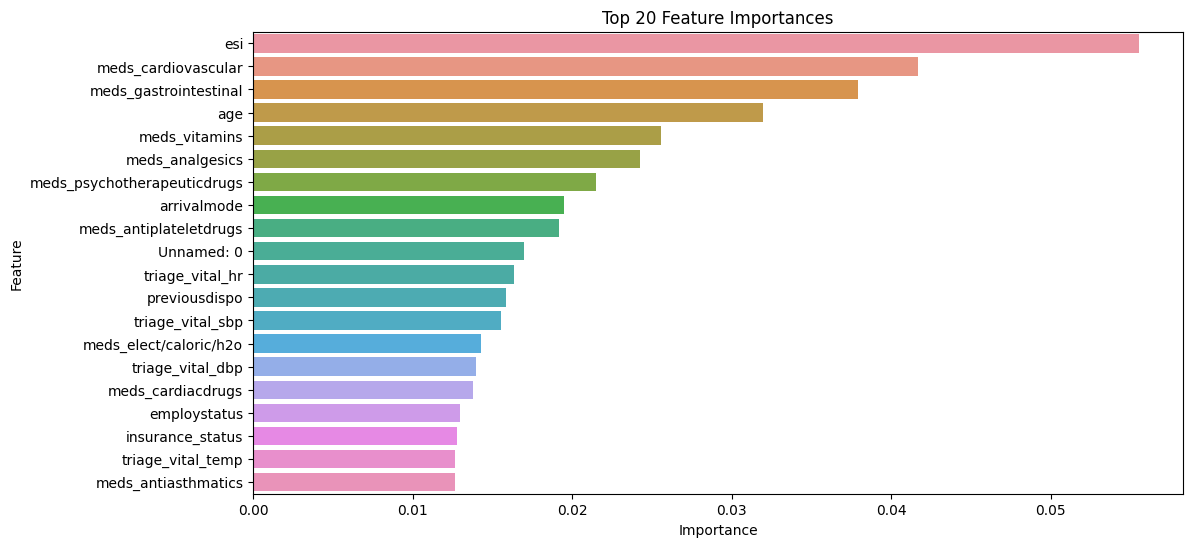

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
X = data.drop('disposition', axis=1)  
y = data['disposition']  # Target column

# Feature importance from Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
importances = rf.feature_importances_

# Mutual Information
mi_scores = mutual_info_classif(X, y)

# Combine and sort features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'MI Score': mi_scores})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Select top 20 features
top_20_features = feature_importance.head(20)

# Print top 20 features
print(top_20_features)

# Visualization of Top 20 Feature Importances
plt.figure(figsize=(12,6))
sns.barplot(data=top_20_features, x='Importance', y='Feature')
plt.title('Top 20 Feature Importances')
plt.show()

In [12]:
# List of top N features based on the feature importance
selected_features = [
    'esi', 'meds_cardiovascular', 'meds_gastrointestinal', 'age', 'meds_vitamins',
    'meds_analgesics', 'meds_psychotherapeuticdrugs', 'arrivalmode', 'meds_antiplateletdrugs',
    'triage_vital_hr', 'previousdispo', 'triage_vital_sbp', 'meds_elect/caloric/h2o', 'triage_vital_dbp', 'meds_cardiacdrugs', 'employstatus',
    'insurance_status', 'triage_vital_temp', 'meds_antiasthmatics', 'meds_diuretics', 
    'arrivalmonth'
]    

### Split the Data & Model Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.calibration import calibration_curve


# Assuming 'data' is your DataFrame and 'selected_features' contains the top features names
X = data[selected_features]
y = data['disposition']  # Replace with your target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Initialize models
logistic_model = LogisticRegression()
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Test Model Performance 

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     78985
           1       0.83      0.58      0.68     33112

    accuracy                           0.84    112097
   macro avg       0.84      0.77      0.79    112097
weighted avg       0.84      0.84      0.83    112097

Accuracy for Logistic Regression: 0.84


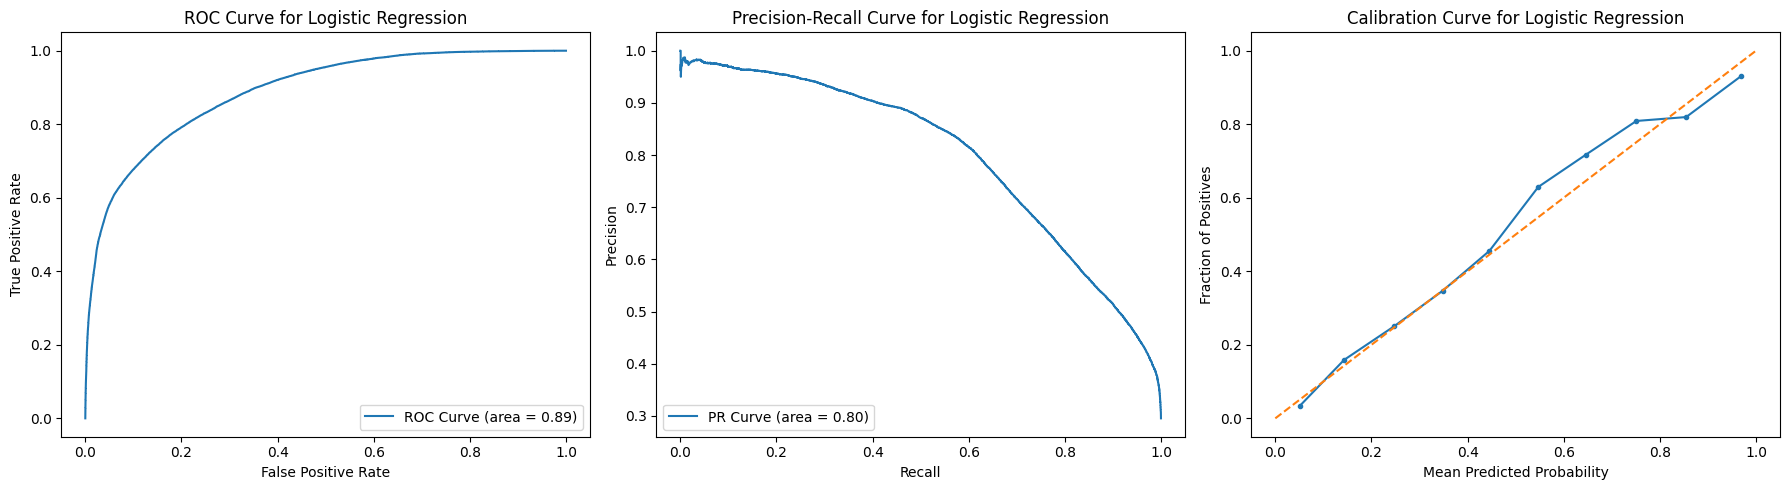

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     78985
           1       0.82      0.67      0.74     33112

    accuracy                           0.86    112097
   macro avg       0.85      0.80      0.82    112097
weighted avg       0.86      0.86      0.85    112097

Accuracy for XGBoost: 0.86


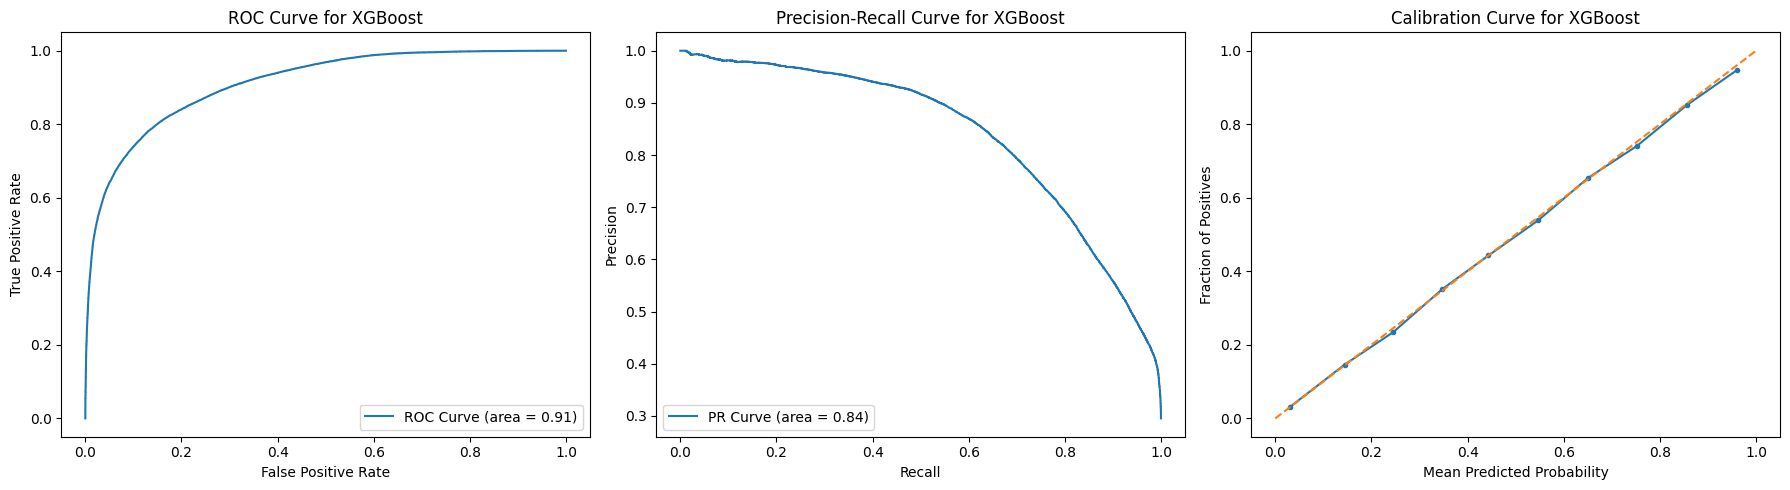

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     78985
           1       0.79      0.67      0.73     33112

    accuracy                           0.85    112097
   macro avg       0.83      0.80      0.81    112097
weighted avg       0.85      0.85      0.85    112097

Accuracy for Random Forest: 0.85


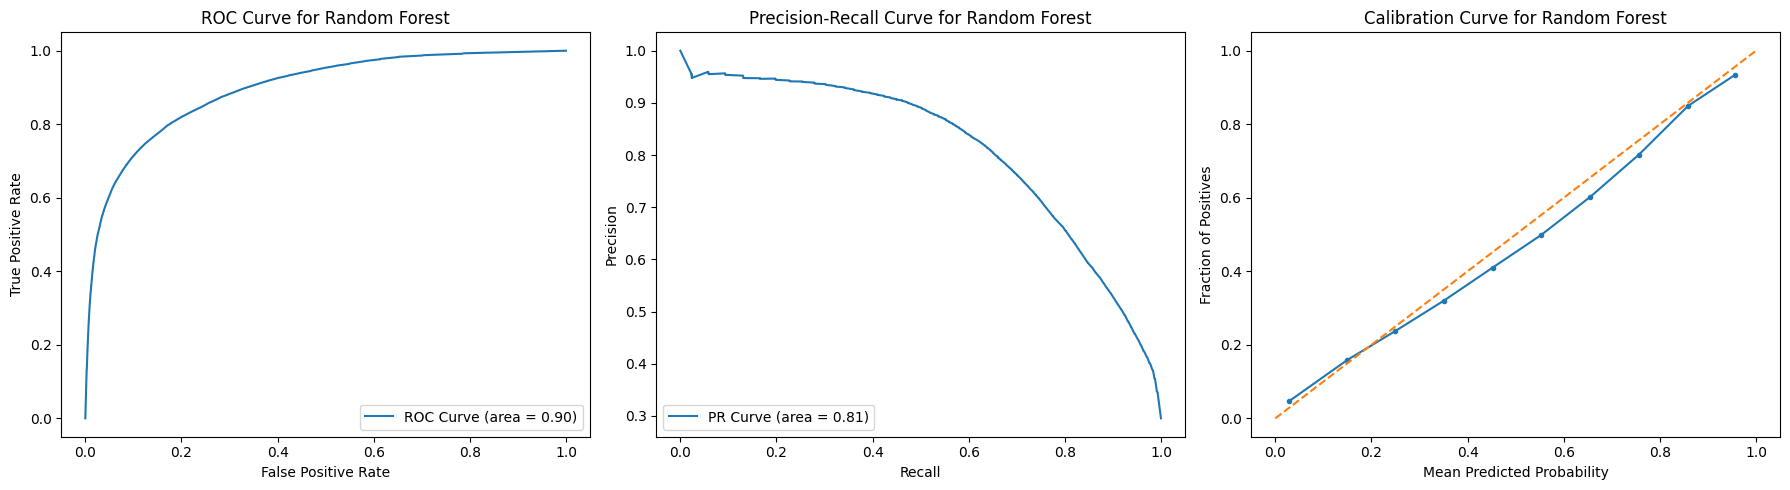

In [57]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, X_val, y_val, model_name):
    # Predictions and probabilities
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    # Print classification report and accuracy
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_val, y_pred))
    print(f"Accuracy for {model_name}: {accuracy_score(y_val, y_pred):.2f}")

    # AUC
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)

    # PR-AUC
    precision, recall, _ = precision_recall_curve(y_val, y_proba)
    pr_auc = auc(recall, precision)

    # Calibration
    prob_true, prob_pred = calibration_curve(y_val, y_proba, n_bins=10)

    # Plotting
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')

    plt.subplot(1, 3, 2)
    plt.plot(recall, precision, label=f'PR Curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')

    plt.subplot(1, 3, 3)
    plt.plot(prob_pred, prob_true, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title(f'Calibration Curve for {model_name}')

    plt.tight_layout()
    plt.show()

# Evaluate models
evaluate_model(logistic_model, X_val, y_val, "Logistic Regression")
evaluate_model(xgb_model, X_val, y_val, "XGBoost")
evaluate_model(rf_model, X_val, y_val, "Random Forest")


AUC for Logistic Regression: 0.89
AUC for XGBoost: 0.91
AUC for Random Forest: 0.90


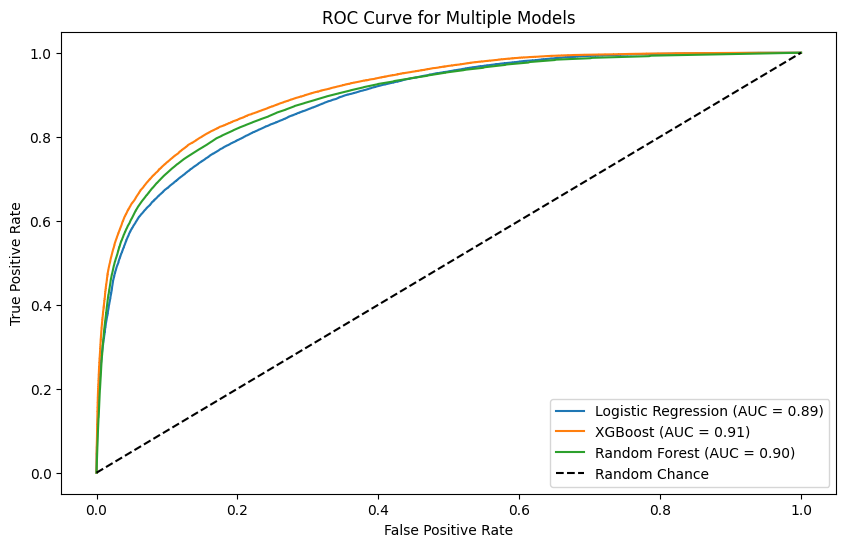

In [58]:
from sklearn.metrics import roc_curve, auc

def plot_combined_roc(models, X_val, y_val, model_names):
    plt.figure(figsize=(10, 6))
    
    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

        # Print AUC value for each model
        print(f'AUC for {name}: {roc_auc:.2f}')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Models')
    plt.legend(loc='lower right')
    plt.show()

# Models and their names
models = [logistic_model, xgb_model, rf_model]
model_names = ["Logistic Regression", "XGBoost", "Random Forest"]

# Plot combined ROC curve and print AUC values
plot_combined_roc(models, X_val, y_val, model_names)


### Odds Ratio for Top 10 Variables (Logistic Regression)

In [83]:
#Standardize your features and then retrain the logistic regression model.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logistic_model.fit(X_scaled, y)

LogisticRegression()

In [84]:
import numpy as np

# Get the odds ratios
odds_ratios = np.exp(logistic_model.coef_[0])
top_indices = np.argsort(odds_ratios)[::-1][:10]
top_features = X.columns[top_indices]
top_odds_ratios = odds_ratios[top_indices]

for feature, odds in zip(top_features, top_odds_ratios):
    print(f"{feature}: {odds:.2f}")


triage_vital_hr: 1.69
age: 1.64
meds_analgesics: 1.47
meds_gastrointestinal: 1.47
meds_cardiovascular: 1.44
meds_psychotherapeuticdrugs: 1.31
meds_antiasthmatics: 1.26
meds_vitamins: 1.25
arrivalmode: 1.17
meds_diuretics: 1.17


### SHAP Summary Plot, Force Plot for 5 Visits, and Dependence Plot

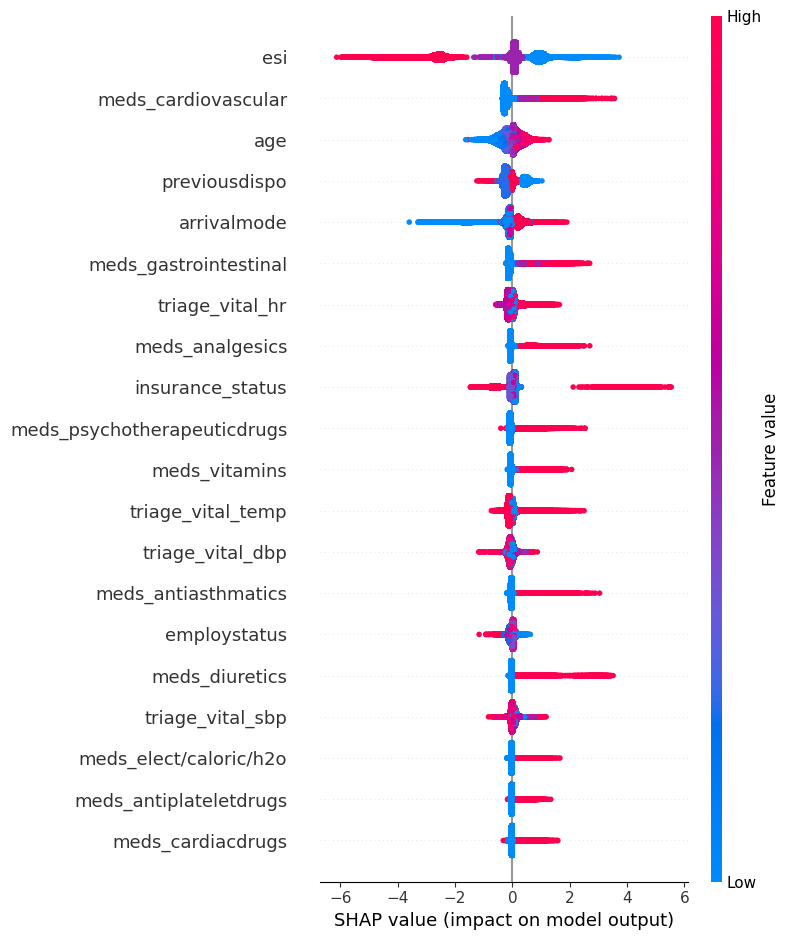

In [16]:
import shap
import random
import matplotlib.pyplot as plt

# Compute SHAP values using your XGBoost model
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

# Develop SHAP Summary Plot for Top Features
shap.summary_plot(shap_values, X_train, max_display=20)

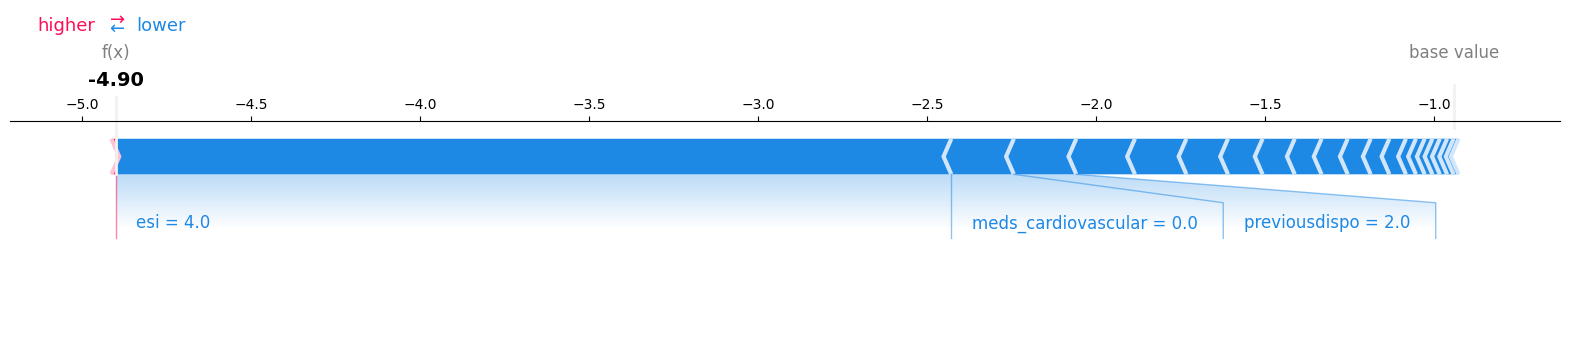

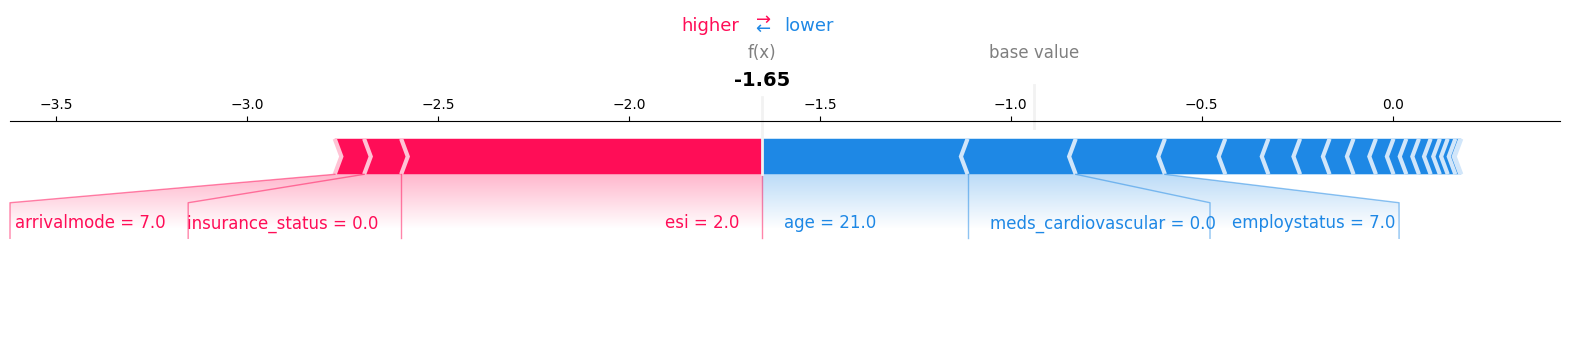

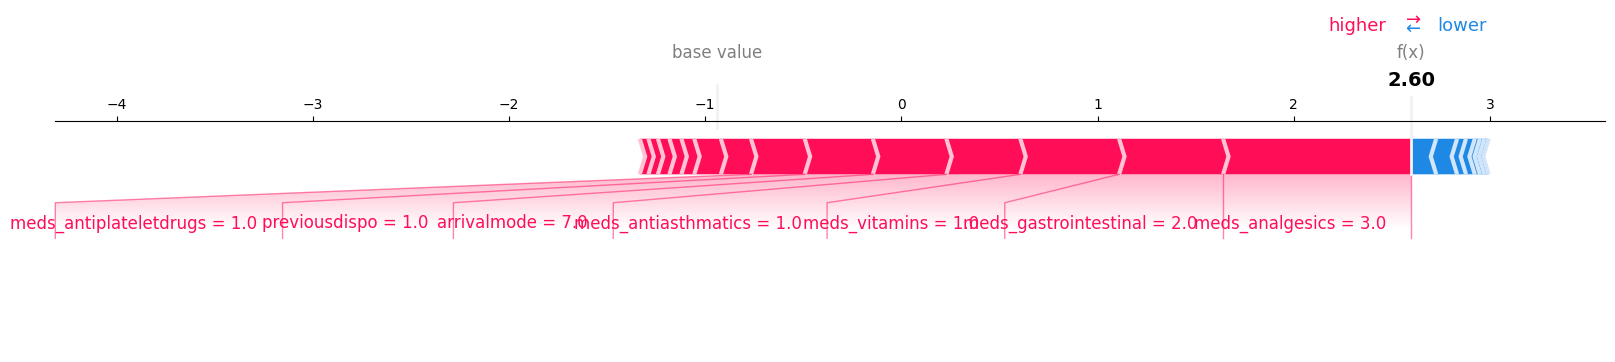

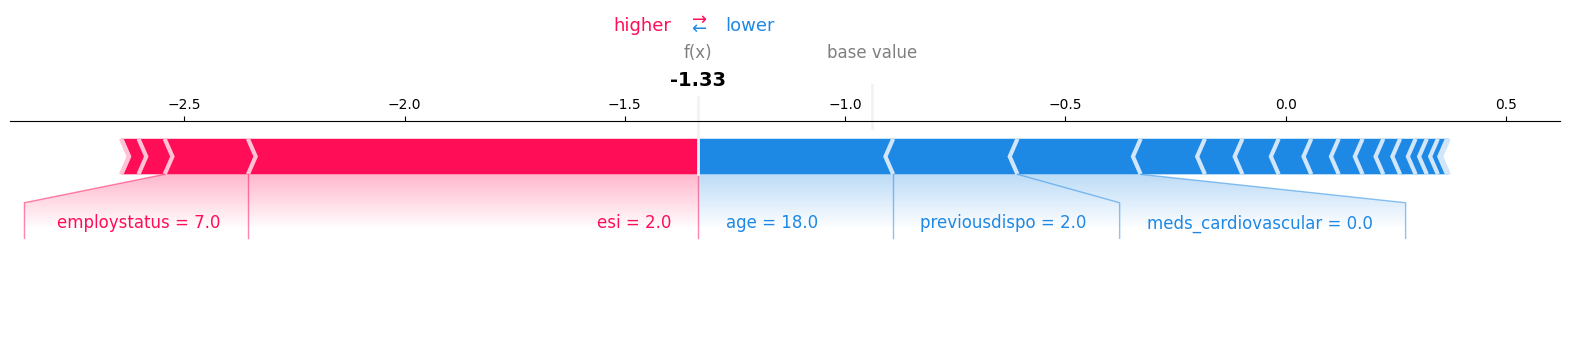

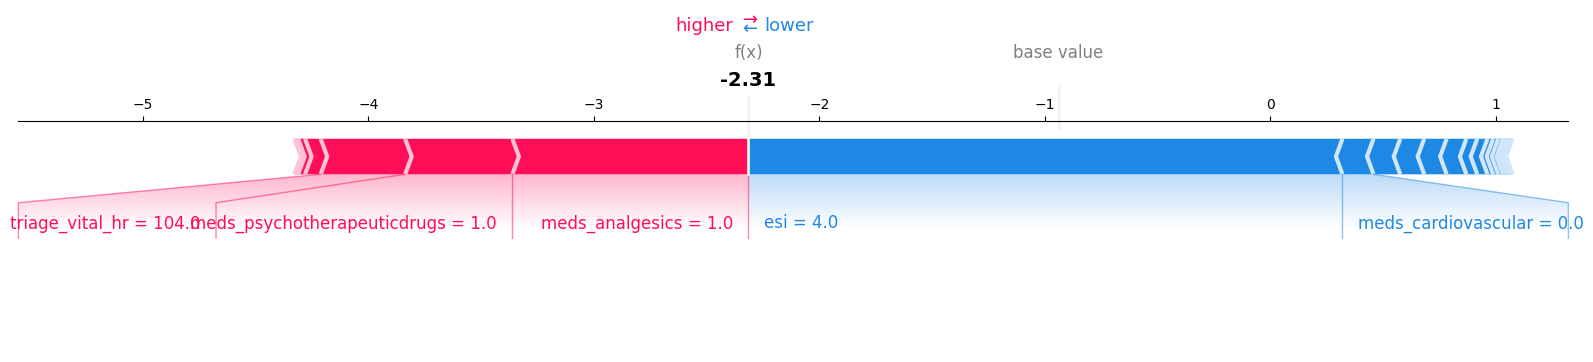

In [22]:
# Develop SHAP Force Plot for 5 Random Visits
# Generate SHAP values for the X_test dataset if not already done
shap_values_test = explainer(X_test)

# Develop SHAP Force Plot for 5 Random Visits
random_indices = random.sample(range(X_test.shape[0]), 5)
for i in random_indices:
    # Display the force plot
    # Note: SHAP values for a single prediction are expected to be a 1D array, hence we use [i] to get the i-th prediction SHAP values
    shap.force_plot(
        base_value=explainer.expected_value,  # Use the scalar expected_value directly
        shap_values=shap_values_test.values[i],  # Access the SHAP values for the i-th instance
        features=X_test.iloc[i],  # Pass the features as a Series
        show=False,
        matplotlib=True
    )
    plt.show()

100%|===================| 335873/336291 [11:24<00:00]        

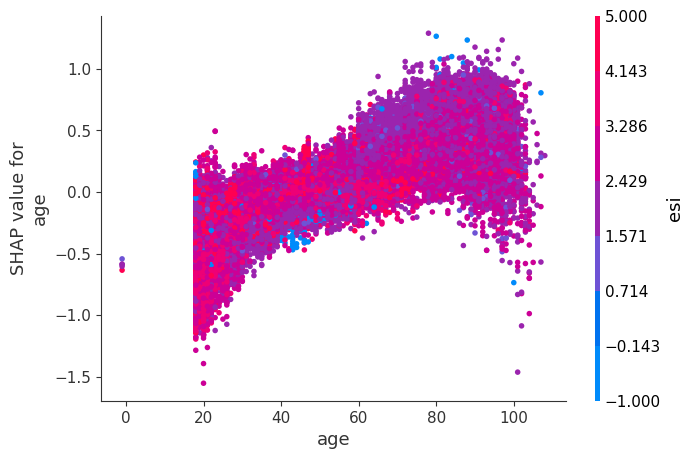

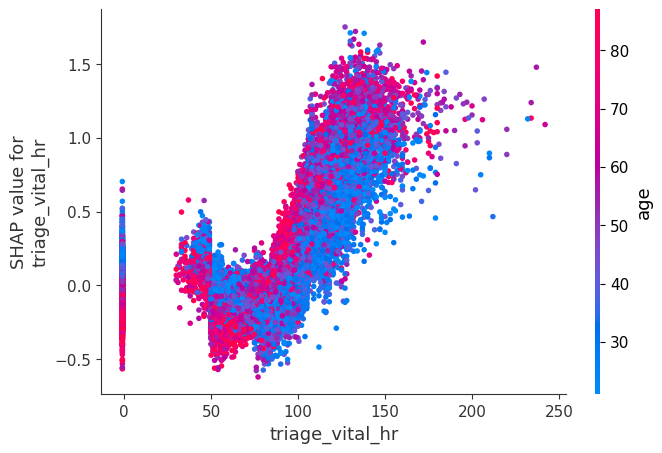

In [26]:
# triage_vital_hr - systolic blood pressure recorded at triage
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for the entire training set
shap_values = explainer(X_train)

# Dependence plot for 'age'
shap.dependence_plot('age', shap_values.values, X_train, show=False)
plt.show()

# Dependence plot for 'systolic_blood_pressure'
shap.dependence_plot('triage_vital_hr', shap_values.values, X_train, show=False)
plt.show()

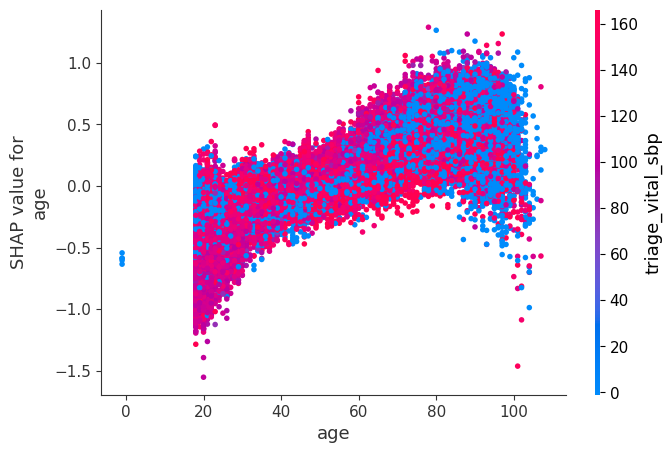

In [27]:
# Generate a SHAP dependence plot for 'age' with interaction from 'triage_vital_sbp'
# Assuming 'age' and 'triage_vital_sbp' are the names of the features in your dataset
shap.dependence_plot(
    "age", 
    shap_values.values, 
    X_train, 
    interaction_index="triage_vital_sbp"
)